In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df['v2'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [5]:
df.shape

(5572, 5)

In [6]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5003,ham,There's someone here that has a year &lt;#&gt...,NaN,NaN,NaN


# 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### drop the last 3 cols

In [8]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.sample(5)

,v1,v2
1555,ham,Ok i found dis pierre cardin one which looks n...
979,ham,Another month. I need chocolate weed and alcohol.
3896,ham,No. Thank you. You've been wonderful
2125,ham,"Sorry im getting up now, feel really bad- tota..."
2642,ham,"They can try! They can get lost, in fact. Tee hee"


### renaming the columns

In [11]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace =True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### importing label encoder so to convert spam and ham value into integer value i.e 1 and 0 to do preprocessing in a smooth way

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### checking missing value

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

### checking duplicate value

In [18]:
df.duplicated().sum()

403

### remove duplicates

In [19]:
df=df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

# EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

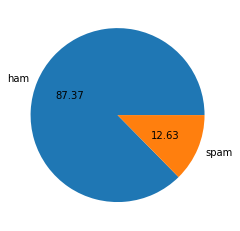

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham','spam'] , autopct="%0.2f")
plt.show()

### Data is imblanced

In [24]:
import nltk


In [25]:
#pip install nltk


In [26]:
#nltk.download('punkt')

### make column realted to number of characters

In [27]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [28]:
df['num_characters']=df['text'].apply(len)

<ipython-input-28-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-30-63c504269349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-32-756a7156c0d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Description about new coloumn

In [35]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000








### Description of new coloumn added with respect to ham

In [36]:
df[df['target']==0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Description of new coloumn added with respect to spam

In [37]:




df[df['target']==1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


### visualiztion with numbers of characters

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

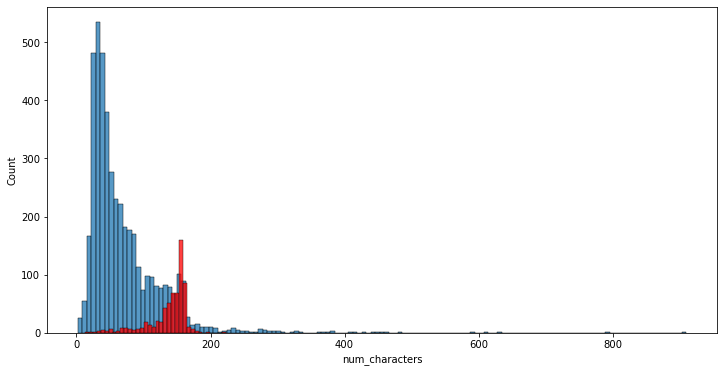

In [39]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color='red')


### visualiztion with numbers of words

<AxesSubplot:xlabel='num_words', ylabel='Count'>

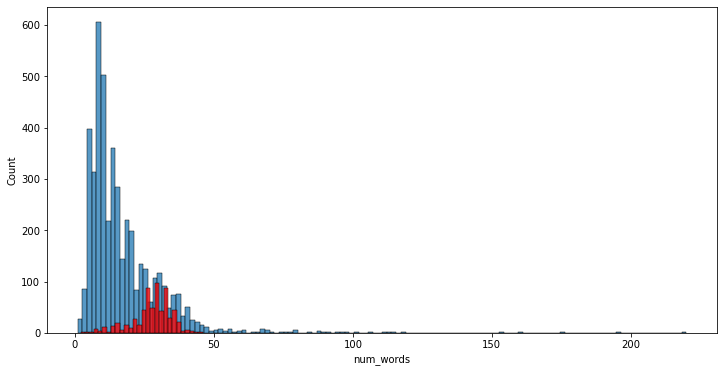

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'] , color='red')

### visualiztion with numbers of sentences

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

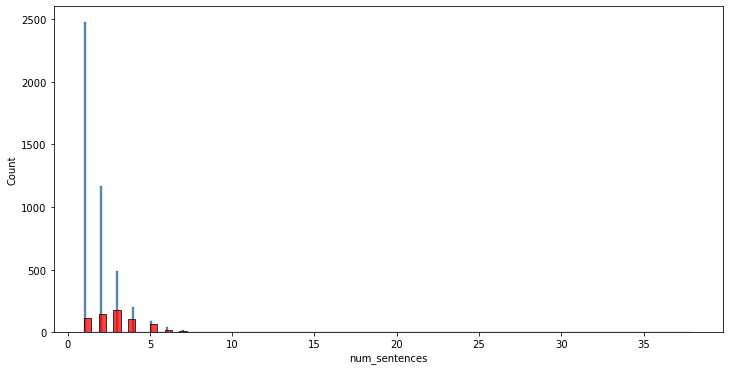

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'] , color='red')

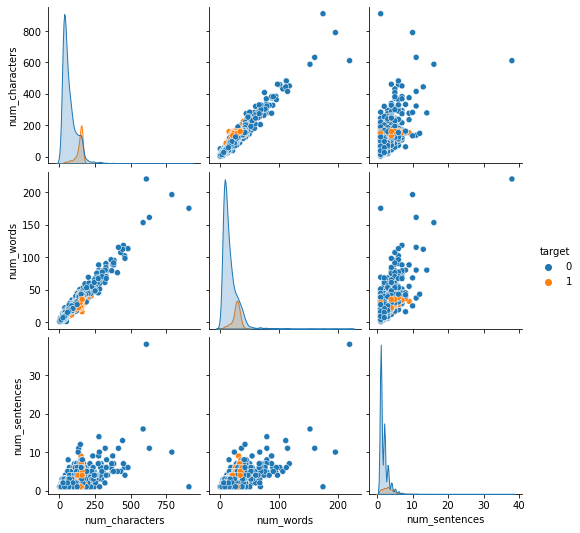

In [42]:
sns.pairplot(df , hue='target')






sns.heatmap(df.corr(), annot=True)

In [43]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


# Data Preprocessing
 - Lower Case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation
 - stemming


In [44]:
from nltk.corpus import stopwords
from string import punctuation
import string
import nltk
nltk.download("punkt")

string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
def transform_text(text):
    #converting text into lowercase
    text = text.lower()
    #breaking sentences into words and conveting into list
    text = nltk.word_tokenize(text)
    #we are only including alpha numeric value 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #removing punctuation and sentences formation words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    # converting similar type of word into one way like for dancing , dance, dances get converted into danc
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [46]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [47]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
transform_text('Hi how Are 20% You')

'hi 20'

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [52]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [53]:
df['transformed_text']=df['text'].apply(transform_text)

<ipython-input-53-98fa9b97913c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### importing wordcloud  
wordcloud will help us to find the spam and ham words 

In [55]:
from wordcloud import WordCloud
wc=WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

### generating spam word cloud

In [56]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

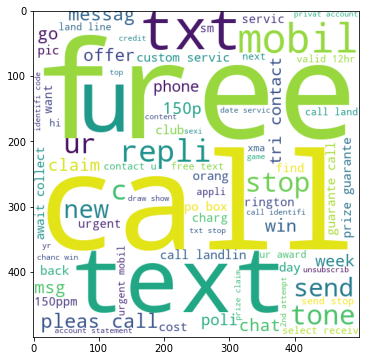

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

### generating ham wordcloud

In [58]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

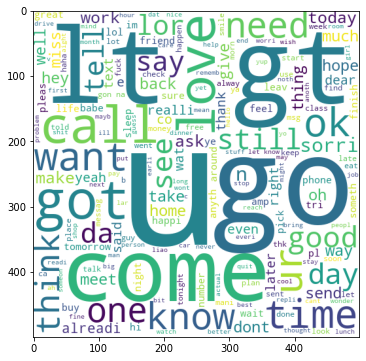

In [59]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Finding top words which are mostly spam 

In [61]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [62]:
len(spam_corpus)

9941

In [63]:



from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


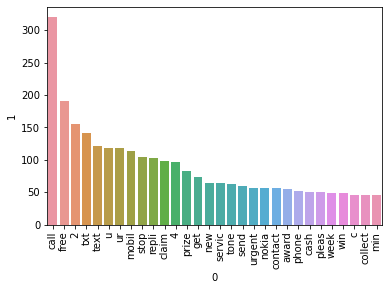

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Finding top words which are mostly ham

In [65]:
spam_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:

len(spam_corpus)

35303

In [67]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


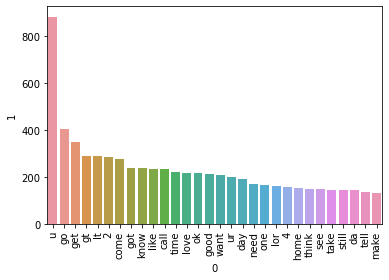

In [68]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Text vectorization using bag of words

In [70]:
#our input is transformed_text  and our output is target
#so here output is in target 
#but transformed_text is in string value so we have to convert into numeric value or to vectorize 
# so we vectorize transformed_text using Bag of Words( it will count the most frequent words that coming and arrange in the vector )

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [72]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
X.shape


(5169, 6677)

In [75]:
y=df['target'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
y.shape

(5169,)

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
X_train , X_test , y_train , y_test=train_test_split(X,y, test_size=0.2 , random_state=2)

In [80]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [81]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

### Model Building by Gaussian Navie Bayes

In [82]:
gnb.fit(X_train , y_train)
y_pred1=gnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred1))
print("precision score =",precision_score(y_test , y_pred1))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred1))

accuracy score = 0.8781431334622823
precision score = 0.5267857142857143
Confusion matrix
[[790 106]
 [ 20 118]]


### Model Building by Multinomial Navie Bayes

In [83]:
mnb.fit(X_train , y_train)
y_pred2=mnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred2))
print("precision score =",precision_score(y_test , y_pred2))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred2))

accuracy score = 0.965183752417795
precision score = 0.84
Confusion matrix
[[872  24]
 [ 12 126]]


### Model Building by Bernoulli Navie Bayes

In [84]:
bnb.fit(X_train , y_train)
y_pred3=bnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred3))
print("precision score =",precision_score(y_test , y_pred3))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred3))

accuracy score = 0.971953578336557
precision score = 0.9823008849557522
Confusion matrix
[[894   2]
 [ 27 111]]


### Now we are going to use  Tfidfvectorizer to convert our transformed_text into vectorizer and try to predict the model

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [86]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [87]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
X.shape

(5169, 6677)

In [89]:
y=df['target'].values

In [90]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train , X_test, y_train, y_test=train_test_split(X,y ,test_size=0.2, random_state=2)

In [93]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [94]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

### Model Building by Gaussian Navie Bayes

In [95]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print("accuracy score=",accuracy_score(y_test ,y_pred1))
print("precision score=" , precision_score(y_test , y_pred1))
print("confusion matrix=" , confusion_matrix(y_test , y_pred1))

accuracy score= 0.874274661508704
precision score= 0.518348623853211
confusion matrix= [[791 105]
 [ 25 113]]


### Model Building by Multinomial Navie Bayes

In [98]:
mnb.fit(X_train , y_train)
y_pred2=mnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred2))
print("precision score =",precision_score(y_test , y_pred2))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred2))

accuracy score = 0.9593810444874274
precision score = 1.0
Confusion matrix
[[896   0]
 [ 42  96]]


#### here precision_score =1.0 means it does not giving any False positive

### Model Building by Bernoulli Navie Bayes

In [97]:
bnb.fit(X_train , y_train)
y_pred3=bnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred3))
print("precision score =",precision_score(y_test , y_pred3))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred3))

accuracy score = 0.971953578336557
precision score = 0.9823008849557522
Confusion matrix
[[894   2]
 [ 27 111]]


# Using different Models

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### making objects of all models

In [99]:
svc=SVC(kernel='sigmoid' , gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
bc=BaggingClassifier(n_estimators=50 , random_state=2)
etc=ExtraTreesClassifier(n_estimators=50 , random_state=2)
xgb=XGBClassifier(n_estimators=50 , random_state=2)


### making one dictionary in which key contains algorithms names and values contains a objects names

In [100]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
     'Xgb':xgb
}

### This algorithm will fitting the data into given models and calculating the accuracy and precision

In [101]:
def train_classifier(clf,X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    return accuracy , precision

In [102]:
#for example taking support vector machine algorithm 

In [103]:
train_classifier(lrc , X_train , y_train , X_test , y_test)

(0.9516441005802708, 0.94)

In [104]:
#making one loop in which traversing the clfs dictonary for each and every algorihtm and calculating it accuracy and precision value 

In [105]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy, current_precision=train_classifier(clf, X_train , y_train , X_test , y_test)
    print("For " , name)
    print("Accuracy - " , current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9908256880733946
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9541284403669725
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  Xgb
Accuracy -  0.971953578336557
Precision -  0.9504132231404959


In [106]:
#making one dataframe in which algorithm name , accuracy and precision is their and sort according to precision in descending order

In [107]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy':accuracy_scores , 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [108]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
9,Xgb,0.971954,0.950413
4,LR,0.951644,0.940000
7,BgC,0.957447,0.861538
3,DT,0.934236,0.830189


In [109]:
#to represent in graph view

In [110]:
performance_df_for_graph=pd.melt(performance_df , id_vars='Algorithm')

In [111]:
performance_df_for_graph

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.970019
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.962282
6,Xgb,Accuracy,0.971954
7,LR,Accuracy,0.951644
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.934236


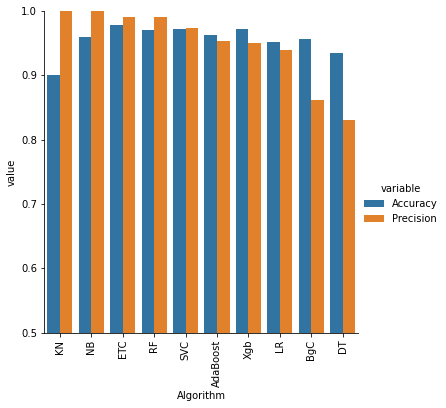

In [112]:
sns.catplot(x='Algorithm' ,y='value',
           hue='variable' , data=performance_df_for_graph , kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve :change the max features parameter of TFID VECTORIZER

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [305]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [306]:



from scipy.sparse import csr_matrix
X=csr_matrix(X)








X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [307]:
X.shape

(5169, 3000)

In [308]:
y=df['target'].values

In [309]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [310]:
from sklearn.model_selection import train_test_split

In [311]:

X_train , X_test, y_train, y_test=train_test_split(X.toarray(),y ,test_size=0.2, random_state=2)

In [312]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [313]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [314]:
### Model Building by Gaussian Navie Bayes

In [315]:
gnb.fit(X_train , y_train)
y_pred1=gnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred1))
print("precision score =",precision_score(y_test , y_pred1))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred1))

accuracy score = 0.8704061895551257
precision score = 0.509090909090909
Confusion matrix
[[788 108]
 [ 26 112]]


In [316]:
### Model Building by Multinomial Navie Bayes


In [317]:
mnb.fit(X_train , y_train)
y_pred2=mnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred2))
print("precision score =",precision_score(y_test , y_pred2))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred2))

accuracy score = 0.971953578336557
precision score = 1.0
Confusion matrix
[[896   0]
 [ 29 109]]


In [318]:
###Model Building by Bernoulli Navie Bayes

In [319]:
bnb.fit(X_train , y_train)
y_pred3=bnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred3))
print("precision score =",precision_score(y_test , y_pred3))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred3))

accuracy score = 0.9835589941972921
precision score = 0.991869918699187
Confusion matrix
[[895   1]
 [ 16 122]]


In [283]:
###Using different Models

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
###making objects of all models

In [132]:
svc=SVC(kernel='sigmoid' , gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
bc=BaggingClassifier(n_estimators=50 , random_state=2)
etc=ExtraTreesClassifier(n_estimators=50 , random_state=2)
xgb=XGBClassifier(n_estimators=50 , random_state=2)


In [133]:
##making one dictionary in which key contains algorithms names and values contains a objects names

In [134]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
     'Xgb':xgb
}

In [135]:
###This algorithm will fitting the data into given models and calculating the accuracy and precision

In [136]:
def train_classifier(clf,X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    return accuracy , precision

In [137]:
#for example taking support vector machine algorithm 

In [138]:
train_classifier(lrc , X_train , y_train , X_test , y_test)

(0.9564796905222437, 0.9696969696969697)

In [139]:
#making one loop in which traversing the clfs dictonary for each and every algorihtm and calculating it accuracy and precision value 

In [140]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy, current_precision=train_classifier(clf, X_train , y_train , X_test , y_test)
    print("For " , name)
    print("Accuracy - " , current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  Xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [141]:
#making one dataframe in which algorithm name , accuracy_max_ft_3000 and precision_max_ft_3000 is their and sort according to precision in descending order

In [142]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_max_ft_3000':accuracy_scores , 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [143]:
#now i am going to merge previous tfid vectorizer without max_featrue=3000 and with max_feature=3000

In [144]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906
4,SVC,0.972921,0.974138,0.974855,0.974576
5,AdaBoost,0.962282,0.954128,0.961315,0.945455
6,Xgb,0.971954,0.950413,0.968085,0.933884
7,LR,0.951644,0.940000,0.956480,0.969697
8,BgC,0.957447,0.861538,0.959381,0.869231
9,DT,0.934236,0.830189,0.933269,0.841584


In [145]:
#to represent in graph view

In [151]:
performance__graph=pd.melt(performance_df , id_vars='Algorithm')

In [152]:
performance__graph

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.970019
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.962282
6,Xgb,Accuracy,0.971954
7,LR,Accuracy,0.951644
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.934236


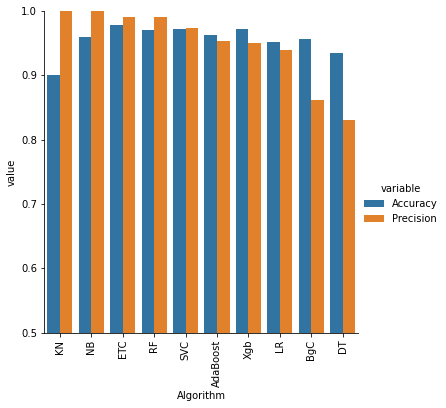

In [153]:
sns.catplot(x='Algorithm' ,y='value',
           hue='variable' , data=performance__graph , kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 3rd improvement is standarization of tfid vectorizer scalling into [0 ,1]

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [155]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [157]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
X.shape

(5169, 3000)

In [159]:
y=df['target'].values

In [160]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train , X_test, y_train, y_test=train_test_split(X,y ,test_size=0.2, random_state=2)

In [163]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [164]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [165]:
###Model Building by Gaussian Navie Bayes

In [166]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print("accuracy score=",accuracy_score(y_test ,y_pred1))
print("precision score=" , precision_score(y_test , y_pred1))
print("confusion matrix=" , confusion_matrix(y_test , y_pred1))

accuracy score= 0.8723404255319149
precision score= 0.5128205128205128
confusion matrix= [[782 114]
 [ 18 120]]


In [167]:
###Model Building by Multinomial Navie Bayes

In [168]:
mnb.fit(X_train , y_train)
y_pred2=mnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred2))
print("precision score =",precision_score(y_test , y_pred2))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred2))

accuracy score = 0.9787234042553191
precision score = 0.9461538461538461
Confusion matrix
[[889   7]
 [ 15 123]]


In [169]:
###Model Building by Bernoulli Navie Bayes

In [170]:
bnb.fit(X_train , y_train)
y_pred3=bnb.predict(X_test)
print("accuracy score =",accuracy_score(y_test,y_pred3))
print("precision score =",precision_score(y_test , y_pred3))
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred3))

accuracy score = 0.9835589941972921
precision score = 0.991869918699187
Confusion matrix
[[895   1]
 [ 16 122]]


In [171]:
###Using different Models

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [173]:
###making objects of all models

In [174]:
svc=SVC(kernel='sigmoid' , gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
bc=BaggingClassifier(n_estimators=50 , random_state=2)
etc=ExtraTreesClassifier(n_estimators=50 , random_state=2)
xgb=XGBClassifier(n_estimators=50 , random_state=2)


In [175]:
###making one dictionary in which key contains algorithms names and values contains a objects names

In [176]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
     'Xgb':xgb
}

In [177]:
###This algorithm will fitting the data into given models and calculating the accuracy and precision

In [178]:
def train_classifier(clf,X_train , y_train , X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    return accuracy , precision

In [179]:
#for example taking support vector machine algorithm 

In [180]:
train_classifier(lrc , X_train , y_train , X_test , y_test)

(0.9671179883945842, 0.9642857142857143)

In [181]:
#making one loop in which traversing the clfs dictonary for each and every algorihtm and calculating it accuracy and precision value 

In [182]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy, current_precision=train_classifier(clf, X_train , y_train , X_test , y_test)
    print("For " , name)
    print("Accuracy - " , current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.943089430894309
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8235294117647058
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  Xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [183]:
#making one dataframe in which algorithm name , accuracy and precision is their and sort according to precision in descending order

In [184]:
new_df=pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_scalling':accuracy_scores , 'Precision_scalling':precision_scores}).sort_values('Precision_scalling', ascending=False)

In [185]:
new_df

,Algorithm,Accuracy_scalling,Precision_scalling
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.979691,0.975610
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.961315,0.945455
0,SVC,0.971954,0.943089
9,Xgb,0.968085,0.933884
7,BgC,0.959381,0.869231
3,DT,0.930368,0.823529


In [186]:
newdata_df=performance_df.merge(new_df, on='Algorithm')

In [187]:
newdata_df

,Algorithm,Accuracy,Precision,Accuracy_scalling,Precision_scalling
0,KN,0.900387,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154
2,ETC,0.977756,0.991453,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906
4,SVC,0.972921,0.974138,0.971954,0.943089
5,AdaBoost,0.962282,0.954128,0.961315,0.945455
6,Xgb,0.971954,0.950413,0.968085,0.933884
7,LR,0.951644,0.940000,0.967118,0.964286
8,BgC,0.957447,0.861538,0.959381,0.869231
9,DT,0.934236,0.830189,0.930368,0.823529


In [188]:
newdata_dfs=newdata_df.merge(temp_df, on='Algorithm')

In [189]:
newdata_dfs

,Algorithm,Accuracy,Precision,Accuracy_scalling,Precision_scalling,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,1.000000
1,NB,0.959381,1.000000,0.978723,0.946154,0.971954,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610,0.979691,0.975610
3,RF,0.970019,0.990826,0.975822,0.982906,0.975822,0.982906
4,SVC,0.972921,0.974138,0.971954,0.943089,0.974855,0.974576
5,AdaBoost,0.962282,0.954128,0.961315,0.945455,0.961315,0.945455
6,Xgb,0.971954,0.950413,0.968085,0.933884,0.968085,0.933884
7,LR,0.951644,0.940000,0.967118,0.964286,0.956480,0.969697
8,BgC,0.957447,0.861538,0.959381,0.869231,0.959381,0.869231
9,DT,0.934236,0.830189,0.930368,0.823529,0.927466,0.818182


In [190]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [192]:
##Voting Classifier

In [193]:
svc=SVC(kernel='sigmoid' , gamma=1.0 , probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50 , random_state=2)
from sklearn.ensemble import VotingClassifier

In [194]:
voting=VotingClassifier(estimators=[('svm' , svc) , ('nb', mnb) , ('et' , etc)], voting='soft')

In [195]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [199]:
y_pred=voting.predict(X_test)
print('Accuracy' , accuracy_score(y_test , y_pred))
print("Precision" , precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [200]:
##Applying Stacking


In [201]:
estimators=[('svm' ,svc) , ('nb' , mnb) , ('et' , etc)]
final_estimator=RandomForestClassifier()

In [202]:
from sklearn.ensemble import StackingClassifier

In [203]:
clf=StackingClassifier(estimators=estimators , final_estimator=final_estimator)

In [204]:
clf.fit(X_train , y_train)
y_pred=clf.predict(X_test)
print("Accuracy" , accuracy_score(y_test , y_pred))
print("precision" , precision_score(y_test , y_pred))

Accuracy 0.9816247582205029
precision 0.9541984732824428


In [99]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb ,open('model.pkl','wb'))